# PC Session 3

**Authors:**
Jonathan Chassot, [Helge Liebert](https://hliebert.github.io/), and [Anthony Strittmatter](http://www.anthonystrittmatter.com)

# **Text analysis**

## Dependencies

In [51]:
## Libraries
library(tm)
library(data.table)
library(ggplot2)
library(tidytext)
library(dplyr)
library(topicmodels)
library(wordcloud)
library(SentimentAnalysis)
library(naivebayes)
library(slam)
library(glmnet)
library(lexicon)

In [50]:
## Simple helper function to view first copora elements, only for illustration in lecture
chead <- function(c) lapply(c[1:2], as.character)

## Setting up a corpus and applying transformations

In [3]:
## To ease computation we just use a limited sample of 10,000 observations.
## Using the csv file from the Kiva Homepage and the file prep-kiva.r, 
## you can clean the data yourself and use a larger sample.
## (The full sample is close to one million observations.)

## Read data
loans <- fread("Data/kiva-tiny.csv", encoding = "UTF-8")
names(loans)

[1] "loanid"            "description"       "fundedamount"     
[4] "loanamount"        "activityname"      "sectorname"       
[7] "loanuse"           "countryname"       "repaymentinterval"

In [4]:
## Set up corpus
setnames(loans, "loanid", "doc_id")
setnames(loans, "description", "text")
corp <- Corpus(DataframeSource(loans))

## Inspect it
corp
lapply(corp[1:2], as.character)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 7
Content:  documents: 10000

$`269894`
[1] "Esteban belongs to the “Las Margarita Ocongate” community bank and lives in the city of Ocongate, in Quispicanchis province, in Cusco department, Peru. He lives with his wife and his 5 year-old daughter Crisanta. The city of Ocongate is two hours from the city of Cusco. Esteban studied law at the National University of San Antonio Abad in Cusco but he was unable to complete his degree for financial reasons. He decided to start a new life. Esteban worked helping lawyers write documentation and then trained to become a legal counselor (someone who provides advice on legal matters including criminal issues, civil issues, labor issues, contracts, transfers, fees, and other cases). After working in different cities in Cusco department as a legal counselor, Esteban decided to set up in the city of Ocongate and opened a legal counseling office. Esteban requires this loan to buy stationery supplies such as paper, pens and many other products. Esteban is grateful for this opportunity and he pledges to make his repayments on time."

$`1247640`
[1] "Kosar is a married woman and entrepreneur and a new borrower through BRAC Pakistan. She has worked hard day-and-night to manage the household expenses. Kosar recently opened a salon and needs to decorate the interior and buy stock of cosmetics and beauty-related electronics. Kosar has requested for a loan from BRAC Pakistan to help establish her salon business by fixing up the interior, for which she needs to buy salon chairs and cosmetics to attract more customers. This is Kosar’s first loan, and she is very happy to have support from BRAC Pakistan and Kiva."

In [5]:
## Main corpus transformations, passed via tm_map()
## Other transformations have to be wrapped in content_transformer()
getTransformations()

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

In [6]:
## All chars to lower case
corp <- tm_map(corp, content_transformer(tolower))
chead(corp)

$`269894`
[1] "esteban belongs to the “las margarita ocongate” community bank and lives in the city of ocongate, in quispicanchis province, in cusco department, peru. he lives with his wife and his 5 year-old daughter crisanta. the city of ocongate is two hours from the city of cusco. esteban studied law at the national university of san antonio abad in cusco but he was unable to complete his degree for financial reasons. he decided to start a new life. esteban worked helping lawyers write documentation and then trained to become a legal counselor (someone who provides advice on legal matters including criminal issues, civil issues, labor issues, contracts, transfers, fees, and other cases). after working in different cities in cusco department as a legal counselor, esteban decided to set up in the city of ocongate and opened a legal counseling office. esteban requires this loan to buy stationery supplies such as paper, pens and many other products. esteban is grateful for this opportunity and he pledges to make his repayments on time."

$`1247640`
[1] "kosar is a married woman and entrepreneur and a new borrower through brac pakistan. she has worked hard day-and-night to manage the household expenses. kosar recently opened a salon and needs to decorate the interior and buy stock of cosmetics and beauty-related electronics. kosar has requested for a loan from brac pakistan to help establish her salon business by fixing up the interior, for which she needs to buy salon chairs and cosmetics to attract more customers. this is kosar’s first loan, and she is very happy to have support from brac pakistan and kiva."

In [7]:
## Remove punctuation
corp <- tm_map(corp, removePunctuation)
chead(corp)
## corp <- tm_map(corp, removePunctuation, ucp = TRUE)
## chead(corp)

$`269894`
[1] "esteban belongs to the “las margarita ocongate” community bank and lives in the city of ocongate in quispicanchis province in cusco department peru he lives with his wife and his 5 yearold daughter crisanta the city of ocongate is two hours from the city of cusco esteban studied law at the national university of san antonio abad in cusco but he was unable to complete his degree for financial reasons he decided to start a new life esteban worked helping lawyers write documentation and then trained to become a legal counselor someone who provides advice on legal matters including criminal issues civil issues labor issues contracts transfers fees and other cases after working in different cities in cusco department as a legal counselor esteban decided to set up in the city of ocongate and opened a legal counseling office esteban requires this loan to buy stationery supplies such as paper pens and many other products esteban is grateful for this opportunity and he pledges to make his repayments on time"

$`1247640`
[1] "kosar is a married woman and entrepreneur and a new borrower through brac pakistan she has worked hard dayandnight to manage the household expenses kosar recently opened a salon and needs to decorate the interior and buy stock of cosmetics and beautyrelated electronics kosar has requested for a loan from brac pakistan to help establish her salon business by fixing up the interior for which she needs to buy salon chairs and cosmetics to attract more customers this is kosar’s first loan and she is very happy to have support from brac pakistan and kiva"

In [8]:
## Remove numbers
corp <- tm_map(corp, removeNumbers)
chead(corp)

$`269894`
[1] "esteban belongs to the “las margarita ocongate” community bank and lives in the city of ocongate in quispicanchis province in cusco department peru he lives with his wife and his  yearold daughter crisanta the city of ocongate is two hours from the city of cusco esteban studied law at the national university of san antonio abad in cusco but he was unable to complete his degree for financial reasons he decided to start a new life esteban worked helping lawyers write documentation and then trained to become a legal counselor someone who provides advice on legal matters including criminal issues civil issues labor issues contracts transfers fees and other cases after working in different cities in cusco department as a legal counselor esteban decided to set up in the city of ocongate and opened a legal counseling office esteban requires this loan to buy stationery supplies such as paper pens and many other products esteban is grateful for this opportunity and he pledges to make his repayments on time"

$`1247640`
[1] "kosar is a married woman and entrepreneur and a new borrower through brac pakistan she has worked hard dayandnight to manage the household expenses kosar recently opened a salon and needs to decorate the interior and buy stock of cosmetics and beautyrelated electronics kosar has requested for a loan from brac pakistan to help establish her salon business by fixing up the interior for which she needs to buy salon chairs and cosmetics to attract more customers this is kosar’s first loan and she is very happy to have support from brac pakistan and kiva"

In [9]:
## For specific transformations, you could also pass a lambda function to remove patterns based on a regex

## Example:
## toSpace <- content_transformer(function (x , pattern) gsub(pattern, " ", x))
## corp <- tm_map(corp, toSpace, "patternhere")

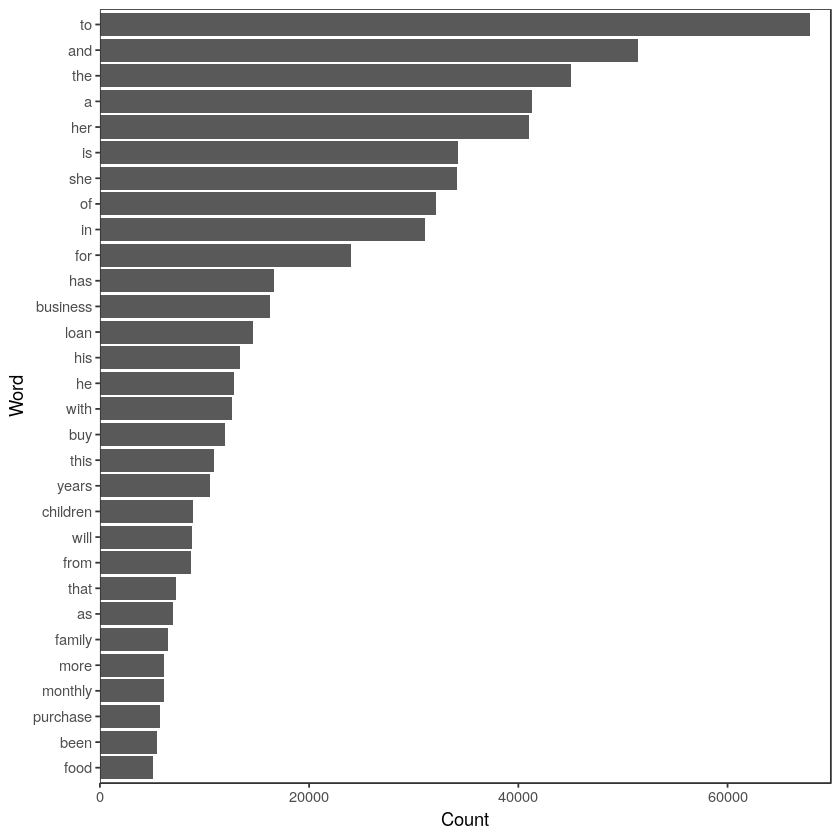

In [10]:
## Look at the most frequent words in our text and see whether we should get rid of some
frequent_terms <- qdap::freq_terms(corp, 30)
plot(frequent_terms)

In [11]:
## More invasive changes: remove generic and custom stopwords
corp <- tm_map(corp, removeWords, stopwords('english'))
chead(corp)

$`269894`
[1] "esteban belongs   “las margarita ocongate” community bank  lives   city  ocongate  quispicanchis province  cusco department peru  lives   wife    yearold daughter crisanta  city  ocongate  two hours   city  cusco esteban studied law   national university  san antonio abad  cusco    unable  complete  degree  financial reasons  decided  start  new life esteban worked helping lawyers write documentation   trained  become  legal counselor someone  provides advice  legal matters including criminal issues civil issues labor issues contracts transfers fees   cases  working  different cities  cusco department   legal counselor esteban decided  set    city  ocongate  opened  legal counseling office esteban requires  loan  buy stationery supplies   paper pens  many  products esteban  grateful   opportunity   pledges  make  repayments  time"

$`1247640`
[1] "kosar   married woman  entrepreneur   new borrower  brac pakistan   worked hard dayandnight  manage  household expenses kosar recently opened  salon  needs  decorate  interior  buy stock  cosmetics  beautyrelated electronics kosar  requested   loan  brac pakistan  help establish  salon business  fixing   interior    needs  buy salon chairs  cosmetics  attract  customers   kosar’s first loan     happy   support  brac pakistan  kiva"

In [12]:
## And a few more words we filter for lack of being informative, this could be extended
corp <- tm_map(corp, removeWords, "loan")
corp <- tm_map(corp, removeWords, "kiva")

In [13]:
## There are a lot of names in the data, these are not really informative
## We apply a dictionary to get rid of some of them
## Truncation because of regex limit
corp <- tm_map(corp, removeWords, common_names[1:floor(length(common_names)/2)])
corp <- tm_map(corp, removeWords, common_names[floor(length(common_names)/2):length(common_names)])
corp <- tm_map(corp, removeWords, freq_first_names[1:floor(nrow(freq_first_names)/2), Name])
corp <- tm_map(corp, removeWords, freq_first_names[floor(nrow(freq_first_names)/2):nrow(freq_first_names), Name])
## corp <- tm_map(corp, removeWords, freq_last_names) # needs to be truncated as well, even longer
chead(corp)

$`269894`
[1] " belongs   “las  ocongate” community bank  lives   city  ocongate  quispicanchis province  cusco department peru  lives   wife    yearold daughter crisanta  city  ocongate  two hours   city  cusco  studied law   national university  san  abad  cusco    unable  complete  degree  financial reasons  decided  start  new life  worked helping lawyers write documentation   trained  become  legal counselor someone  provides advice  legal matters including criminal issues civil issues labor issues contracts transfers fees   cases  working  different cities  cusco department   legal counselor  decided  set    city  ocongate  opened  legal counseling office  requires    buy stationery supplies   paper pens    products   grateful   opportunity   pledges  make  repayments  time"

$`1247640`
[1] "kosar   married woman  entrepreneur   new borrower  brac pakistan   worked hard dayandnight  manage  household expenses kosar recently opened  salon  needs  decorate  interior  buy stock  cosmetics  beautyrelated electronics kosar  requested     brac pakistan  help establish  salon business  fixing   interior    needs  buy salon chairs  cosmetics  attract  customers   kosar’s first      happy   support  brac pakistan  "

In [14]:
## Stem document
## corp <- tm_map(corp, stemDocument, language = 'english')
## chead(corp)

In [15]:
## Strip extra whitespace
corp <- tm_map(corp, stripWhitespace)
chead(corp)

$`269894`
[1] " belongs “las ocongate” community bank lives city ocongate quispicanchis province cusco department peru lives wife yearold daughter crisanta city ocongate two hours city cusco studied law national university san abad cusco unable complete degree financial reasons decided start new life worked helping lawyers write documentation trained become legal counselor someone provides advice legal matters including criminal issues civil issues labor issues contracts transfers fees cases working different cities cusco department legal counselor decided set city ocongate opened legal counseling office requires buy stationery supplies paper pens products grateful opportunity pledges make repayments time"

$`1247640`
[1] "kosar married woman entrepreneur new borrower brac pakistan worked hard dayandnight manage household expenses kosar recently opened salon needs decorate interior buy stock cosmetics beautyrelated electronics kosar requested brac pakistan help establish salon business fixing interior needs buy salon chairs cosmetics attract customers kosar’s first happy support brac pakistan "

## Building a document-term matrix and restricting the feature set

In [16]:
## Build a document-term or term-document matrix
## Default is term-frequency weighting (document length normalized count)
## TF-IDF weighting also possible

## dtm <- TermDocumentMatrix(corp)
dtm <- DocumentTermMatrix(corp)

## Inspect the document-term matrix
inspect(dtm)

<<DocumentTermMatrix (documents: 10000, terms: 23589)>>
Non-/sparse entries: 516846/235373154
Sparsity           : 100%
Maximal term length: 121
Weighting          : term frequency (tf)
Sample             :
         Terms
Docs      business buy children family help income lives married old years
  1037639        0   0        1      3    0      0     0       1   2     3
  137566         2   4        6      3    0      0     3       3   5     5
  141930         0   1        1      0    1      0     1       2   3     2
  152994         0   5        3      0    1      0     0       1   1     3
  219458         0   0        0      0    0      0     0       5   0     5
  264698         0   0        4      3    2      1     1       0   0     0
  472746         1   0        0      3    2      0     0       0   0     1
  489429         0   2        0      1    0      1     1       0   0     1
  87540          4   1        1      1    1      1     0       1   1     2
  96153          1   1      

In [17]:
## Inspect most popular words
findFreqTerms(dtm, lowfreq=1000)

[1] "buy"         "city"        "community"   "financial"   "life"       
  [6] "lives"       "make"        "new"         "products"    "time"       
 [11] "two"         "working"     "yearold"     "business"    "customers"  
 [16] "expenses"    "first"       "hard"        "help"        "married"    
 [21] "needs"       "requested"   "support"     "woman"       "can"        
 [26] "family"      "hardworking" "increase"    "loans"       "requesting" 
 [31] "selling"     "well"        "farm"        "farmer"      "get"        
 [36] "husband"     "income"      "old"         "order"       "sells"      
 [41] "village"     "years"       "expand"      "future"      "like"       
 [46] "money"       "now"         "nwtf"        "philippines" "php"        
 [51] "save"        "sell"        "store"       "works"       "also"       
 [56] "capital"     "children"    "earns"       "education"   "group"      
 [61] "hopes"       "local"       "members"     "pay"         "provide"    
 [66] "used"        "work"        "farming"     "four"        "good"       
 [71] "improve"     "three"       "day"         "house"       "living"     
 [76] "one"         "profits"     "purchase"    "rice"        "school"     
 [81] "food"        "items"       "area"        "five"        "mother"     
 [86] "partner"     "wants"       "enough"      "additional"  "able"       
 [91] "continue"    "year"        "member"      "shop"        "use"        
 [96] "since"       "small"       "earn"        "sales"       "market"     
[101] "plans"       "home"        "better"      "water"

In [18]:
## Inspect associations
findAssocs(dtm, 'hard', 0.15)

$hard
       nwtf philippines      attain      parent  sustaining       works 
       0.41        0.39        0.38        0.37        0.35        0.28 
        php      enough     general     provide   requested   borrowing 
       0.27        0.24        0.23        0.22        0.21        0.21 
       save      afford        send        work     vending     college 
       0.20        0.20        0.20        0.19        0.19        0.18 
       like     working       money  faithfully  additional      secure 
       0.17        0.16        0.16        0.16        0.16        0.16 
  groceries     expands     minimum       loans      future       store 
       0.16        0.16        0.16        0.15        0.15        0.15 
       word continually 
       0.15        0.15

In [19]:
## Remove sparse terms, prevents cluster node from choking and saves time
## may also improve tractability

## Tweak the sparse parameter to influence # of words
dtms <- removeSparseTerms(dtm, sparse=0.90)
dim(dtms)
dtms <- dtms[row_sums(dtms) > 0, ]
dim(dtms)

[1] 10000    88

[1] 9999   88

In [20]:
## Alternatively, filter words by mean tf-idf

## Calculate average term-specific tf-idf weights as
## mean(word count/document length) * log(ndocs/ndocs containing word)
termtfidf <- tapply(dtm$v/row_sums(dtm)[dtm$i], dtm$j, mean) *
             log2(nDocs(dtm)/col_sums(dtm > 0))
summary(termtfidf)

## Only include terms with at least median tf-idf score
dtmw <- dtm[, (termtfidf >= 0.15)]
dim(dtmw)
## And documents within which these terms occur - this may induce selection
dtmw <- dtmw[row_sums(dtmw) > 0, ]
dim(dtmw)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01578 0.13426 0.18688 0.26038 0.28069 2.29098 

[1] 10000 15807

[1]  9752 15807

In [21]:
## Much less frequent terms now
findFreqTerms(dtmw, lowfreq=100)

[1] "cusco"       "degree"      "pakistan"    "salon"       "fellowship" 
 [6] "cattle"      "fishing"     "restaurant"  "fish"        "khr"        
[11] "fattening"   "pig"         "vitamins"    "spbd"        "furniture"  
[16] "seedlings"   "jewelry"     "pmpc"        "maría"       "rickshaw"   
[21] "water"       "describes"   "gdmpc"       "mobile"      "tea"        
[26] "taxi"        "door"        "kadet"       "cloth"       "hspfi"      
[31] "hair"        "charcoal"    "firewood"    "acre"        "solar"      
[36] "filter"      "tailoring"   "cereals"     "babban"      "gona"       
[41] "inr"         "toilet"      "motorcycle"  "kgs"         "som"        
[46] "embroidery"  "josé"        "interactuar" "palm"        "aski"       
[51] "sanitary"    "organic"

## Visualizations of word frequencies

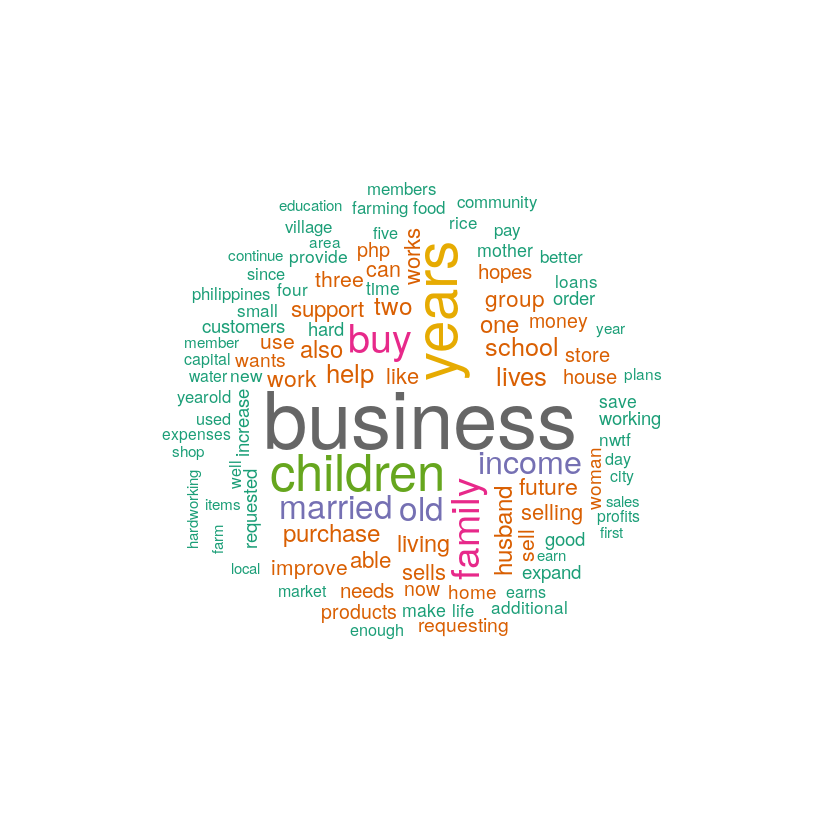

In [22]:
## Simple visualization
wordcloud(corp, max.words = 100, random.order = FALSE,
          colors = brewer.pal(8, "Dark2"))

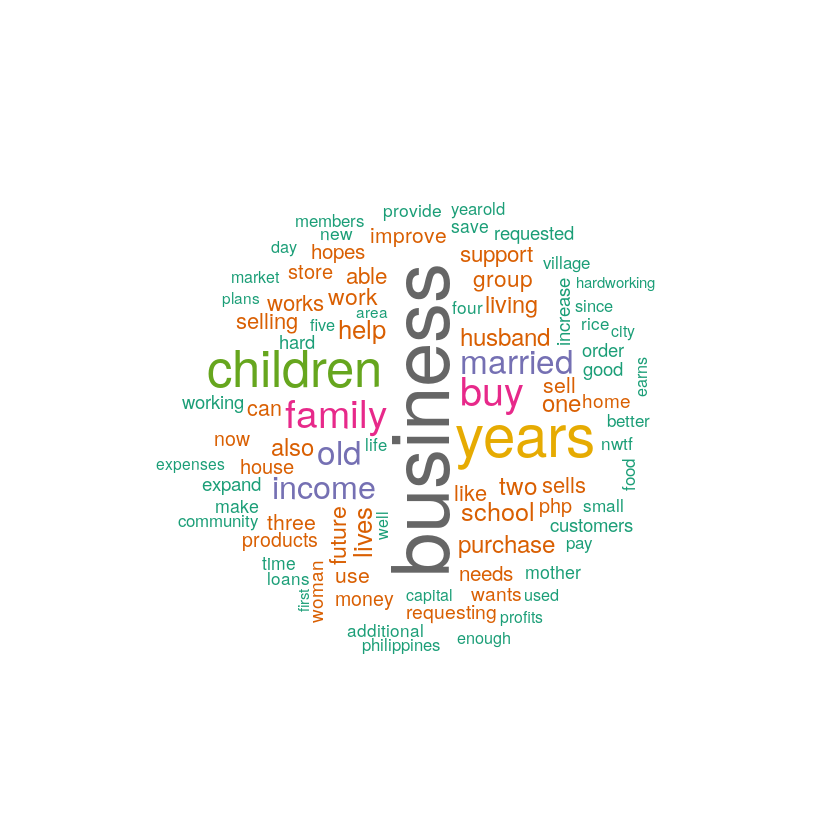

In [23]:
## Counts from dtms
counts <- sort(colSums(as.matrix(dtms)), decreasing = TRUE)
counts <- data.frame(word = names(counts), freq = counts)
wordcloud(words = counts$word, freq = counts$freq,
          max.words = 100, random.order = FALSE,
          colors = brewer.pal(8, "Dark2"))

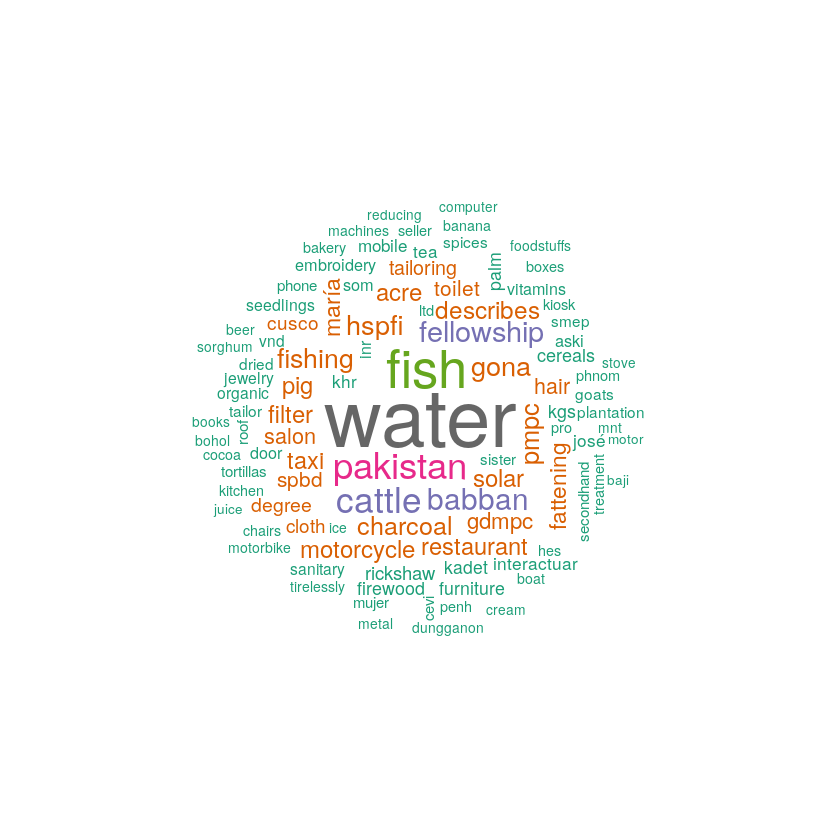

In [24]:
## Counts from dtmw
counts <- sort(colSums(as.matrix(dtmw)), decreasing = TRUE)
counts <- data.frame(word = names(counts), freq = counts)
wordcloud(words = counts$word, freq = counts$freq,
          max.words = 100, random.order = FALSE,
          colors = brewer.pal(8, "Dark2"))

## Dictionary methods: Inferring sentiment

In [25]:
## Dictionary method: Sentiment analysis using dictionaries
sentiment <- analyzeSentiment(dtms, language = "english")
sentiment <- convertToDirection(sentiment$SentimentGI)

## Potentially add back to original data for further analysis
## loans$sentiment <- sentiment

## look at sentiment distribution
table(sentiment)

sentiment
negative  neutral positive 
     108     1386     8505 

## Unsupervised generative model: Topic model

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
business,business,family,children,business
buy,years,buy,business,years
years,children,years,help,future
children,income,business,school,also
old,married,children,living,can


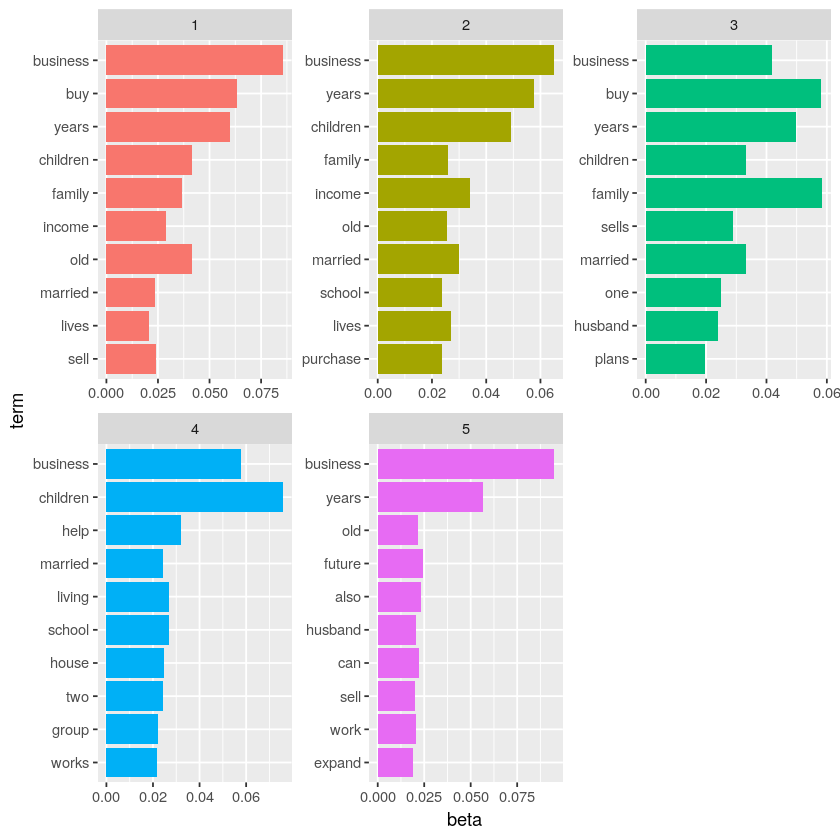

In [26]:
## Unsupervised method: Topic model
lda <- LDA(dtms, k = 5, control = list(seed = 100))
## lda <- LDA(dtmw, k = 5, control = list(seed = 100))

## Most likely topic for each document, could merge this to original data
## topic <- topics(lda, 1)

## Five most frequent terms for each topic
terms(lda, 5)

## Plot most frequent terms and associated probabilities by topic
tpm <- tidy(lda, matrix = "beta")

topterms <-
    tpm %>%
    group_by(topic) %>%
    top_n(10, beta) %>%
    ungroup() %>%
    arrange(topic, -beta)

topterms %>%
    mutate(term = reorder(term, beta)) %>%
    ggplot(aes(term, beta, fill = factor(topic))) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~ topic, scales = "free") +
    coord_flip()

In [27]:
## not working well due to standardized templates
## let us try to use the `loanuse' statement text for the generative topic model 

# new data
loanuse <- loans[, .(doc_id, loanuse)]
setnames(loanuse, "loanuse", "text")

# new dtm, this time do most of the transformations in one step
dtmuse <- DocumentTermMatrix(Corpus(DataframeSource(loanuse)),
                             control = list(weighting = weightTf,
                                            language = "english",
                                            tolower = TRUE,
                                            removePunctuation = TRUE,
                                            removeNumbers = TRUE,
                                            stopwords = TRUE,
                                            stemming = FALSE,
                                            wordLengths = c(3, Inf)))
inspect(dtmuse)

# Recalculate weights
termtfidf <- tapply(dtmuse$v/row_sums(dtmuse)[dtmuse$i], dtmuse$j, mean) *
    log2(nDocs(dtmuse)/col_sums(dtmuse > 0))
summary(termtfidf)

## Filter by tf-idf
## dim(dtmuse)
dtmuse <- dtmuse[, (termtfidf >= 1.70)]
dtmuse <- dtmuse[row_sums(dtmuse) > 0, ]
## dim(dtmuse)

<<DocumentTermMatrix (documents: 10000, terms: 4130)>>
Non-/sparse entries: 57029/41242971
Sparsity           : 100%
Maximal term length: 30
Weighting          : term frequency (tf)
Sample             :
        Terms
Docs     additional business buy pay products purchase rice sell supplies water
  165281          0        0   0   0        1       10    1    0        0     0
  251885          0        0   0   0        0        1    0    0        0     0
  284790          0        0   1   0        0        0    1    0        0     1
  32203           0        0   1   0        0        0    1    0        0     0
  323832          0        0   0   0        1        1    1    0        1     0
  450012          0        1   1   0        2        0    1    0        0     0
  453623          0        0   1   0        0        0    1    0        0     0
  562708          0        0   0   0        0        1    0    0        0     0
  631944          0        0   1   0        1        0    0    

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1829  1.2406  1.6610  1.8666  2.2146 13.2877 

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
cattle,capital,cattle,poultry,capital
working,working,farmland,renovate,cattle
capital,sanitary,tuition,tuition,farmland
tuition,goats,cereals,cereals,tuition
sheep,vehicle,rickshaw,goats,sheep
cows,motorbike,car,capital,car
cocoa,secondhand,motorbike,treatment,foodstuffs
compost,cows,machines,wool,sanitary
rickshaw,repairs,engine,chicks,calves
expanding,tuition,calves,cows,improvements


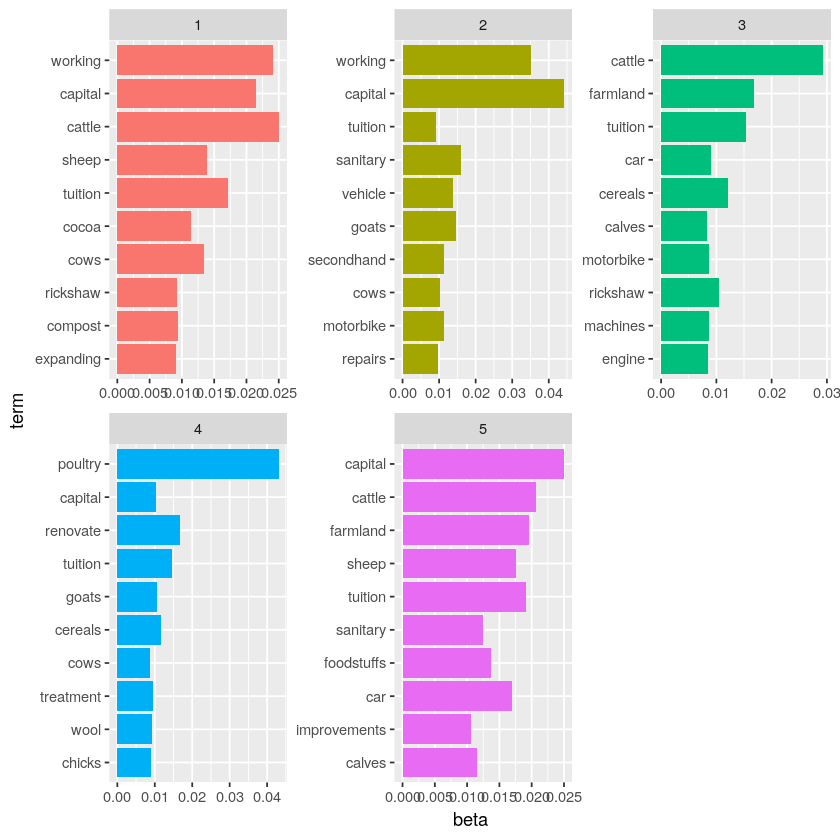

In [28]:
## Unsupervised method: Topic model, this time for loanuse statement
lda <- LDA(dtmuse, k = 5, control = list(seed = 100))
## str(lda)

## Most likely topic for each document, could merge this to original data
topic <- topics(lda, 1)
## Five most frequent terms for each topic
terms(lda, 10)

## Plot most frequent terms and associated probabilities by topic
tpm <- tidy(lda, matrix = "beta")

topterms <-
    tpm %>%
    group_by(topic) %>%
    top_n(10, beta) %>%
    ungroup() %>%
    arrange(topic, -beta)

topterms %>%
    mutate(term = reorder(term, beta)) %>%
    ggplot(aes(term, beta, fill = factor(topic))) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~ topic, scales = "free") +
    coord_flip()

## Supervised methods: Data preparation

In [29]:
## Supervised methods: Prep data
## Convert the sparse term-document matrix to a standard data frame
bag <- as.data.frame(as.matrix(dtms))
dim(bag)

[1] 9999   88

In [30]:
## Convert token counts to simple binary indicators
bag <- as.data.frame(sapply(bag, function(x) as.numeric(x > 0)))
bag$doc_id <- rownames(as.matrix(dtms))

## Add outcomes from the original data: Predict agricultural sector
loans$agsector <- as.numeric(loans$sectorname=="Agriculture")
bag <- merge(bag, loans[, .(agsector, loanamount, doc_id)], by = "doc_id")
                            
# How many people want a loan in the agricultural sector?                            
table(bag$agsector)


   0    1 
7510 2489 

In [31]:
## Partition data in test and training sample
set.seed(100)
testids <- sample(floor(nrow(bag)/3))
xtrain <- as.matrix(bag[-testids, !(names(bag) %in% c("agsector", "loanamount", "doc_id"))])
ytrain <- as.factor(bag[-testids,  "agsector"])
xtest  <- as.matrix(bag[ testids, !(names(bag) %in% c("agsector", "loanamount", "doc_id"))])
ytest  <- as.factor(bag[ testids,  "agsector"])

## Supervised generative model: Naive Bayes classifier

In [32]:
## Supervised generative model: Naive Bayes
nbclassifier <- naive_bayes(xtrain, ytrain, laplace = 1)
nbpred <- predict(nbclassifier, xtest)
summary(nbpred)

0    1 
2003 1330

In [33]:
## Performance statistics: Classification rate
round(1-mean(as.numeric(nbpred != ytest)), 2)

## Performance statistics: Confusion matrix (
## table(nbpred, ytest)
caret::confusionMatrix(nbpred, ytest)

[1] 0.66

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1668  335
         1  785  545
                                        
               Accuracy : 0.664         
                 95% CI : (0.6476, 0.68)
    No Information Rate : 0.736         
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.2571        
 Mcnemar's Test P-Value : <2e-16        
                                        
            Sensitivity : 0.6800        
            Specificity : 0.6193        
         Pos Pred Value : 0.8328        
         Neg Pred Value : 0.4098        
             Prevalence : 0.7360        
         Detection Rate : 0.5005        
   Detection Prevalence : 0.6010        
      Balanced Accuracy : 0.6497        
                                        
       'Positive' Class : 0             
                                        

In [34]:
## Supervised text regression: L1 penalized logistic regression
l1classifier <- cv.glmnet(xtrain, ytrain, alpha = 1, family = "binomial")
l1pred <- as.factor(predict(l1classifier, xtest, s = "lambda.min", type = "class"))
summary(l1pred)

0    1 
2896  437

In [35]:
## Performance statistics: Classification rate
round(1-mean(as.numeric(l1pred != ytest)), 2)

## Performance statistics: Confusion matrix
caret::confusionMatrix(l1pred, ytest)

[1] 0.79

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2321  575
         1  132  305
                                          
               Accuracy : 0.7879          
                 95% CI : (0.7736, 0.8017)
    No Information Rate : 0.736           
    P-Value [Acc > NIR] : 2.047e-12       
                                          
                  Kappa : 0.3491          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9462          
            Specificity : 0.3466          
         Pos Pred Value : 0.8015          
         Neg Pred Value : 0.6979          
             Prevalence : 0.7360          
         Detection Rate : 0.6964          
   Detection Prevalence : 0.8689          
      Balanced Accuracy : 0.6464          
                                          
       'Positive' Class : 0               
                                          

## Supervised text regression: L<sub>1</sub> penalized logistic classifier

In [36]:
## L1 logistic classifier using rare feature upweighting
sdweights <- apply(xtrain, 2, sd)
l1classifier <- cv.glmnet(xtrain, ytrain, alpha = 1, family = "binomial",
                          standardize = FALSE, penalty.factor  = sdweights)
l1pred <- as.factor(predict(l1classifier, xtest, s = "lambda.min", type = "class",
                            penalty.factor  = sdweights))
summary(l1pred)

0    1 
2898  435

In [40]:
## Performance statistics: Classification rate
round(1-mean(as.numeric(l1pred != ytest)), 2)
## Performance statistics: Confusion matrix
caret::confusionMatrix(l1pred, ytest)

[1] 0.79

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2322  576
         1  131  304
                                          
               Accuracy : 0.7879          
                 95% CI : (0.7736, 0.8017)
    No Information Rate : 0.736           
    P-Value [Acc > NIR] : 2.047e-12       
                                          
                  Kappa : 0.3486          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9466          
            Specificity : 0.3455          
         Pos Pred Value : 0.8012          
         Neg Pred Value : 0.6989          
             Prevalence : 0.7360          
         Detection Rate : 0.6967          
   Detection Prevalence : 0.8695          
      Balanced Accuracy : 0.6460          
                                          
       'Positive' Class : 0               
                                          

## Remarks and additions

In [38]:
## How would you go about improving performce for the classifiers?






## (Addendum: Regression example: L<sub>1</sub> penalized linear regression)

In [39]:
## Further example: Predict Loan Amount
## Supervised text regression: L1 penalized linear regression

## Rebuild outcome vectors
#ytrain <- as.matrix(bag[-testids,  "loanamount"])
#ytest  <- as.matrix(bag[ testids,  "loanamount"])

## Estimate and predict
#l1predictor <- cv.glmnet(xtrain, ytrain, alpha = 1, family = "gaussian")
#l1pred <- predict(l1predictor, xtest, s = "lambda.min", type = "response")

## RMSE
#round(sqrt(mean((l1pred - ytest)^2)), 2)
#caret::postResample(l1pred, ytest)